## To do list:

- Create a feature like: 'Longest word said', we can build it by going word by word choosing the longest one and then verifying with a method that there are no special characters
- Most used emoji
- Number of times you have said: ['joder', 'mama', 'pedo']
- average response time
- create a better function to identify the names of the users
- % of messages that are replied within a day
- % of messages replied within an hour / minute / 10 minutes etc
- exact days with 'more' messages
- a graph with the most used emojis by user
- numero de links enviados
- different metrics for "mean time in between messages" and "mean time to respond a request"no es lo mismo que nacho me pregunte algo y yo le responda a las dos horas, y calcular el tiempo medio de res- puesta, que calcular la media sin mas entre mensaje
- average message per day 
- count '<multimedia omitido' y <multimedia omitted (in english)
- weeks without messages (I think it would involve df.resample('w') and check for weeks without messages
- distribucion de los mensajes entre la madrugada, mañana, tarde y noche

In [1]:
# https://github.com/huggingface/nlp
# ask Jacopo about the other site with the papers

In [31]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime # this actually means import datetime.datetime
import seaborn as sns
import emoji

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [352]:
from methods import create_chat_list, clean_chat_list

chat = create_chat_list()
chat = clean_chat_list(chat)


In [353]:
from methods import chat_to_df

df = chat_to_df(chat)

In [358]:
df[(df.emoji_count != 0) & (df.user == 'Gleb Uni')].emoji_count.sum()

1156

In [359]:
df[(df.emoji_count != 0) & (df.user == 'Nacho')].emoji_count.sum()

147

Resampling examples // Does not make sense

In [63]:
df.resample('d')

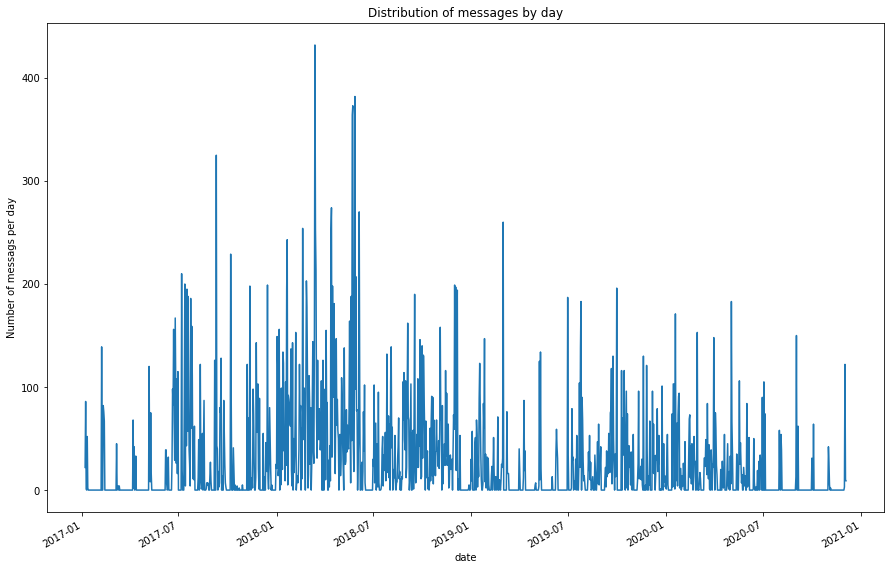

In [314]:
from charts import message_distribution_plot

message_distribution_plot(df,'day')

In [313]:
df

,id,user,message,year,month,week,day,dayweek,hour,minute,emoji_count,emoji
date,,,,,,,,,,,,
2017-06-19 18:27:00,0,Gleb Uni,Con buenas vibras y concentración easy,2017,6,25,19,0,18,27,0,0
2017-06-19 18:27:00,1,Nacho,Sii,2017,6,25,19,0,18,27,0,0
2017-06-19 18:28:00,2,Nacho,"De esto, basicamente pienso que cuando tu sab...",2017,6,25,19,0,18,28,0,0
2017-06-19 18:28:00,3,Nacho,"Es decir, se trstaria de evaluar un producto ...",2017,6,25,19,0,18,28,0,0
2017-06-19 18:28:00,4,Nacho,Mas o menos,2017,6,25,19,0,18,28,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-30 23:36:00,39994,Gleb Uni,https://towardsdatascience.com/analyzethechat...,2020,6,27,30,1,23,36,0,0
2020-06-30 23:36:00,39995,Gleb Uni,sii,2020,6,27,30,1,23,36,0,0
2020-06-30 23:36:00,39996,Gleb Uni,justo,2020,6,27,30,1,23,36,0,0


In [342]:
from charts import value_counts_plot, value_counts_plot_sns

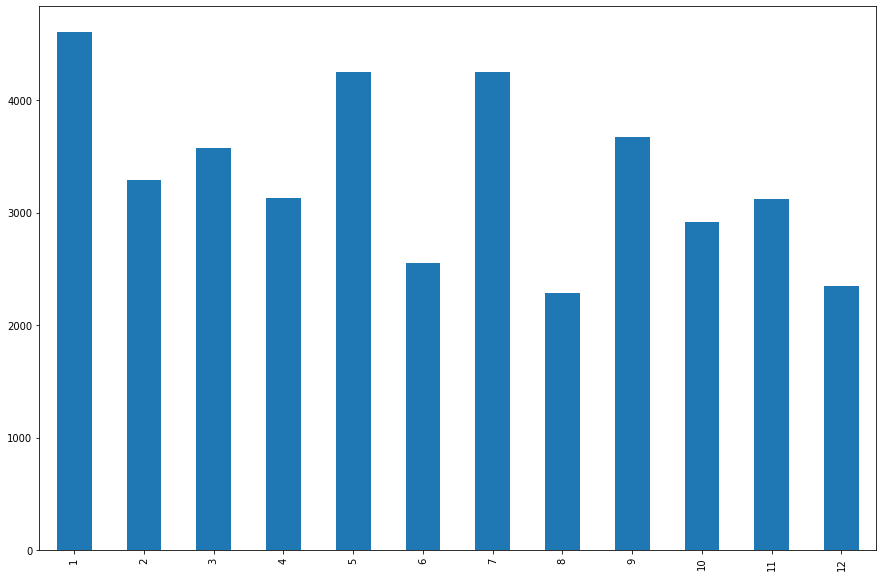

In [343]:
value_counts_plot(df.month)

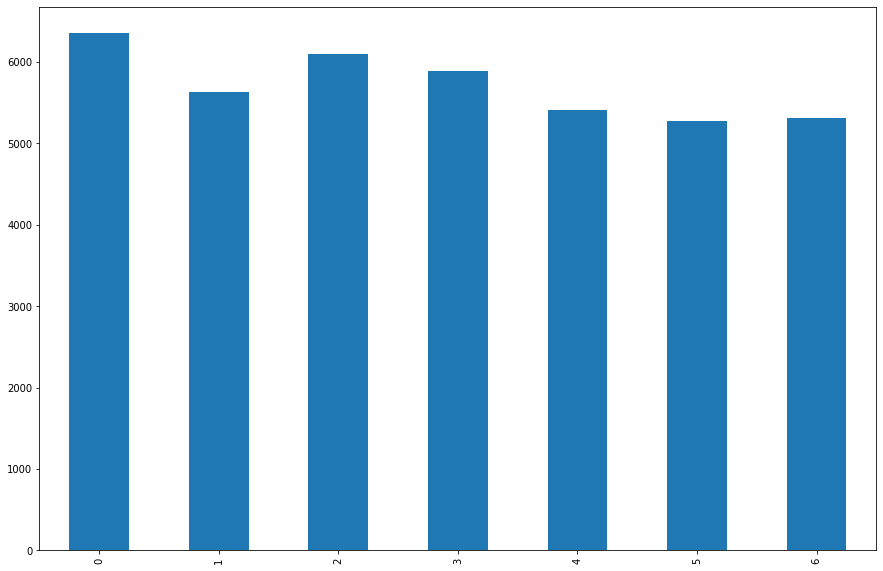

In [345]:
value_counts_plot(df.dayweek)

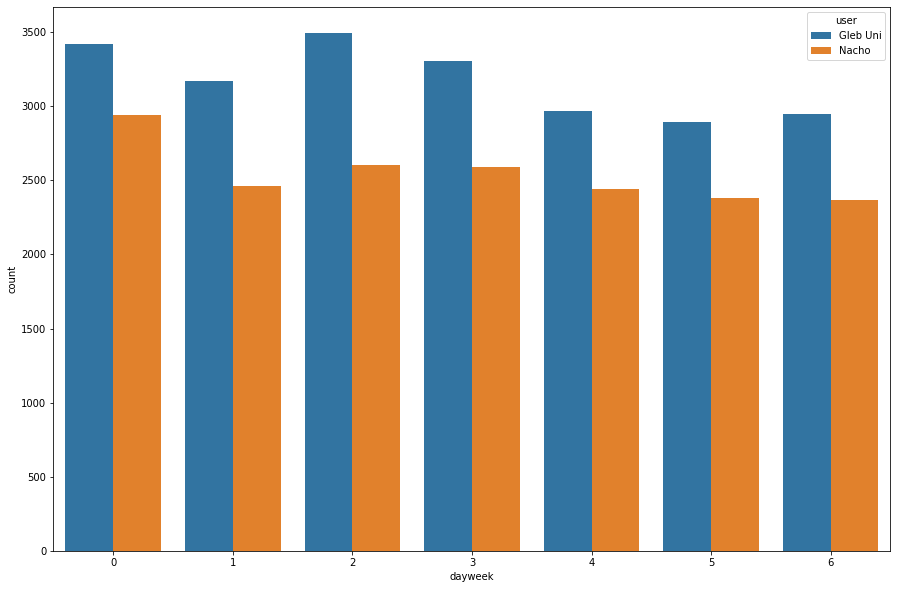

In [351]:
from charts import value_counts_plot_sns_hue

value_counts_plot_sns_hue(df, 'dayweek', 'user')

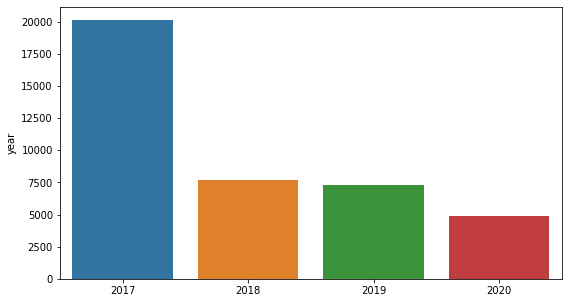

In [64]:
plt.figure(figsize=(9,5))
sns.barplot(
    x = list(set(df.year.values )),
    y = df.year.value_counts(),
    # hue=df.user.unique()
)

In [65]:
len(df.iloc[0].message)x

39

### To do: make a column with the length of the message, make a column whether or not there is an emoji, make a column of answer time and then some charts on average answering time

In [66]:
df_lag = df.copy()

In [67]:
# Would be nice to create a lag function for all the users, the thing is that I am not completely sure how to do it
#for user in unique_users:
        

In [68]:
df_gleb = df_lag[df.user == 'Gleb Uni']
df_nacho = df_lag[df.user == 'Nacho']


In [69]:
df_gleb.iloc[:,0].index

DatetimeIndex(['2017-06-19 18:27:00', '2017-06-19 18:29:00',
               '2017-06-19 18:29:00', '2017-06-19 18:30:00',
               '2017-06-19 18:30:00', '2017-06-19 18:30:00',
               '2017-06-19 18:30:00', '2017-06-19 18:30:00',
               '2017-06-19 20:10:00', '2017-06-19 20:10:00',
               ...
               '2020-06-30 23:32:00', '2020-06-30 23:32:00',
               '2020-06-30 23:33:00', '2020-06-30 23:33:00',
               '2020-06-30 23:33:00', '2020-06-30 23:36:00',
               '2020-06-30 23:36:00', '2020-06-30 23:36:00',
               '2020-06-30 23:36:00', '2020-06-30 23:36:00'],
              dtype='datetime64[ns]', name='date', length=22201, freq=None)

In [70]:
df_gleb.loc[:,'date2'] = df_gleb.iloc[:,0].index
df_nacho.loc[:, 'date2'] = df_nacho.iloc[:,0].index

/home/neuralcrypto/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/neuralcrypto/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [ ]:
df_gleb.date2.shift(1).values
df_nacho.date2.shift(1).values

In [ ]:
df_gleb['lag'] = df_gleb.date2.shift(1)
df_nacho['lag'] = df_nacho.date2.shift(1)

In [17]:
df_nacho.iloc[2056:2089]

NameError: name 'df_nacho' is not defined

In [ ]:
df_gleb['response time'] = (df_gleb.date2 - df_gleb.lag)
df_nacho['response time'] = (df_nacho.date2 - df_nacho.lag)

In [ ]:
df_gleb.loc[:,['response time']]

In [18]:
df_gleb

NameError: name 'df_gleb' is not defined

In [ ]:
# mean response time of gleb
# I am thinking that the best possible way of getting an accurate response would be to count how many responses
# have been executed in the same minute, and from that point, calculate the time that it took to reply based
# on the lenght of the message, an 'ok' is 1 second, 'tio pero que quieres decir' is '3seconds', etc

# different metrics for "mean time in between messages" and "mean time to respond a request"
# no es lo mismo que nacho me pregunte algo y yo le responda a las dos horas, y calcular el tiempo medio de res-
# puesta, que calcular la media sin mas entre mensaje
df_gleb.iloc[:,12].mean().total_seconds()

### Create the column, replied within 5 minutes and within 1 day

In [308]:
from methods import longest_word_user

longest_word_user(df)

{'Gleb Uni': 'Jajahajajajajajajajajjajajqjajajajajajq',
 'Nacho': 'Wowowowowowowowowowowowowow'}

In [303]:
longest_word_user(df)

{'Gleb Uni': 'Jajahajajajajajajajajjajajqjajajajajajq',
 'Nacho': 'Wowowowowowowowowowowowowow'}